In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from typing import List, Tuple, Dict

from evaluate_prf1 import evaluate_prf1

In [18]:
def get_correct_alignment_ambiguities(pkl_path, req_assoc, req_overlap, req_err_ang, req_err_dist):
    pkl_file = open(pkl_path, 'rb')
    overlap_mat, err_ang_mat, err_dist_mat, num_assoc_mat, ambiguity_mat = pickle.load(pkl_file)
    pkl_file.close()

    # Correct alignment is defined as an alignment where overlap_mat >= req_overlap, num_assoc_mat >= req_assoc
    # and where the alignment error  is less than req_err_ang and req_err_dist
    correct_alignment = np.logical_and.reduce((overlap_mat >= req_overlap, num_assoc_mat >= req_assoc,
                                               err_ang_mat <= req_err_ang, err_dist_mat <= req_err_dist))
    return ambiguity_mat[correct_alignment] 

In [8]:

# methods = ["point2d", "point3d", "vol2d", "vol3d", "gravity", "volgrav"]
methods = ["point2d", "point3d", "gravity"]
req_assoc_s2s1 = {
    "gravity": 8,
    "point2d": 11,
    "point3d": 11,
    "vol2d": 7,
    "vol3d": 8,
    "volgrav": 6
}
req_assoc_a2s1 = {
    "gravity": 10,
    "point2d": 11,
    "point3d": 11,
    "vol2d": 7,
    "vol3d": 7,
    "volgrav": 7
}
results_dir = "/home/masonbp/results/west_point_2023/segment_align/07_ambiguity/sparkal2_sparkal1_full/"
req_assoc = req_assoc_s2s1
req_overlap = 0.75
# results_dir = "/home/masonbp/results/west_point_2023/segment_align/06_for_pr/acl_jackal2_sparkal1"
# req_assoc = req_assoc_a2s1
# req_overlap = 0.5



[0.46380493 0.98306162]
[0.46380493]
[0.94251036 0.70779471 0.52800838 0.57095283 0.34627705 0.67362341
 0.79327542]


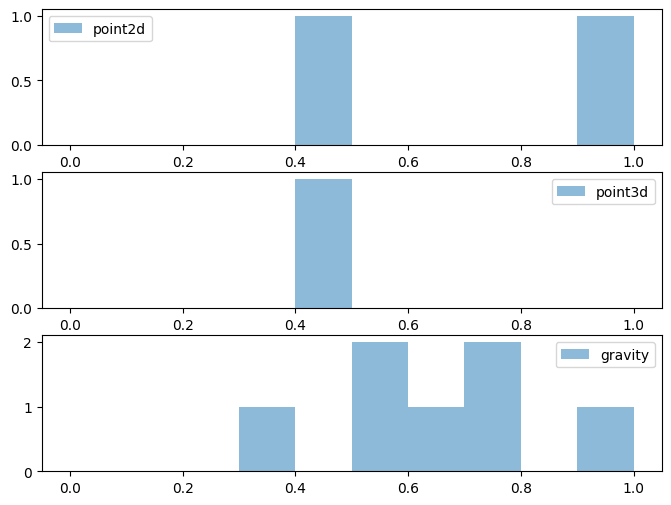

In [34]:
fig, ax = plt.subplots(len(methods), 1, figsize=(8, 6))
for i, method in enumerate(methods):
    pkl_path = f"{results_dir}/{method}.pkl"
    ambiguities = get_correct_alignment_ambiguities(pkl_path, req_assoc[method], req_overlap=0.5, req_err_ang=3.0, req_err_dist=1.5)
    print(ambiguities)
    ax[i].hist(ambiguities, bins=np.linspace(0.0, 1.0, 11), alpha=0.5, label=method)
    ax[i].legend()

point2d: 0.874459150866563
point3d: 0.8741055164238405
gravity: 0.8714983742342459


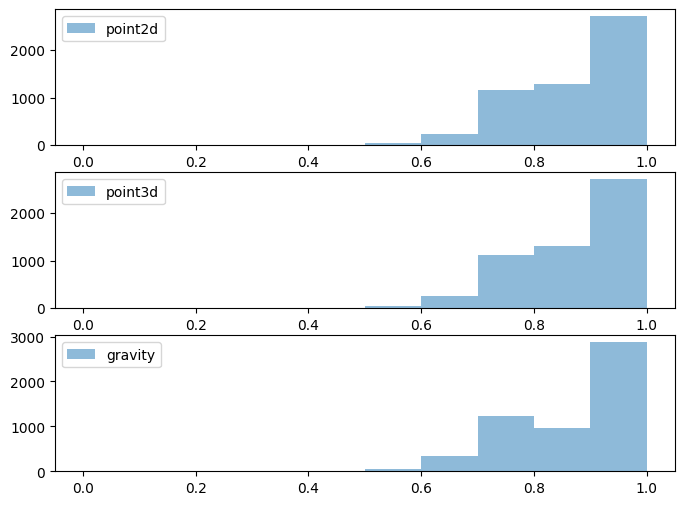

In [40]:
fig, ax = plt.subplots(len(methods), 1, figsize=(8, 6))
for i, method in enumerate(methods):
    pkl_path = f"{results_dir}/{method}.pkl"
    pkl_file = open(pkl_path, 'rb')
    overlap_mat, err_ang_mat, err_dist_mat, num_assoc_mat, ambiguity_mat = pickle.load(pkl_file)
    pkl_file.close()
    ax[i].hist(ambiguity_mat.reshape(-1), bins=np.linspace(0.0, 1.0, 11), alpha=0.5, label=method)
    ax[i].legend()
    print(f"{method}: {np.nanmean(ambiguity_mat)}")